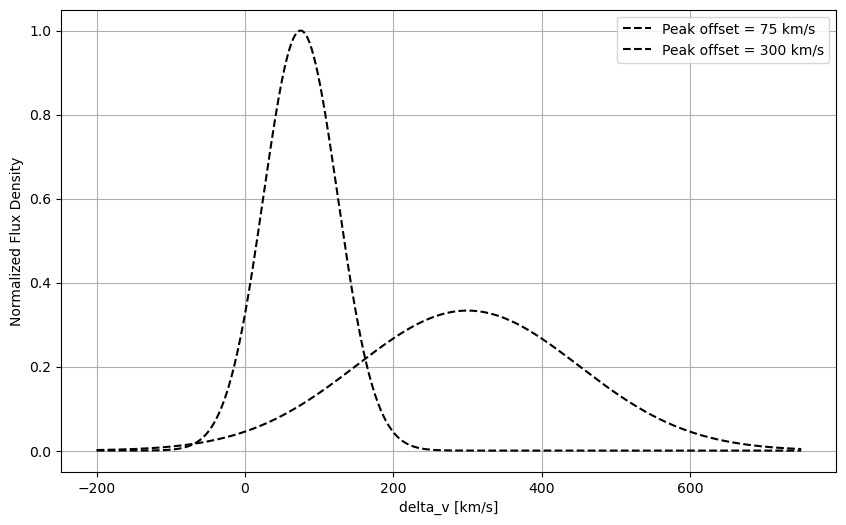

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def intrinsic_lya_lineshape(velocity, delta_v, sigma_alpha):
    lineshape = np.exp(-0.5 * ((velocity - delta_v) / sigma_alpha)**2)
    return lineshape



if __name__ == "__main__":
   
    sigma_alpha1 = 50
    sigma_alpha2 = 150
    velocity = np.linspace(-200, 750, 1000)

   
    delta_v1 = 75  #First offset
    delta_v2 = 300  # Second offset

    # Two line shapes
    lineshape1 = intrinsic_lya_lineshape(velocity, delta_v1, sigma_alpha1)
    lineshape2 = intrinsic_lya_lineshape(velocity, delta_v2, sigma_alpha2)

    #Plotting the ressult
    plt.figure(figsize=(10, 6))
    plt.plot(velocity, lineshape1_normalized, 'k--', label=f"Peak offset = {delta_v1} km/s")
    plt.plot(velocity, lineshape2_normalized, 'k--', label=f"Peak offset = {delta_v2} km/s")
    plt.xlabel("delta_v [km/s]")
    plt.ylabel("Normalized Flux Density") #actually haven't normalized yet
    plt.legend()
    plt.grid()
    plt.show()


### Trying to play with asymmetry and v_separation(velocity difference between two peaks?)

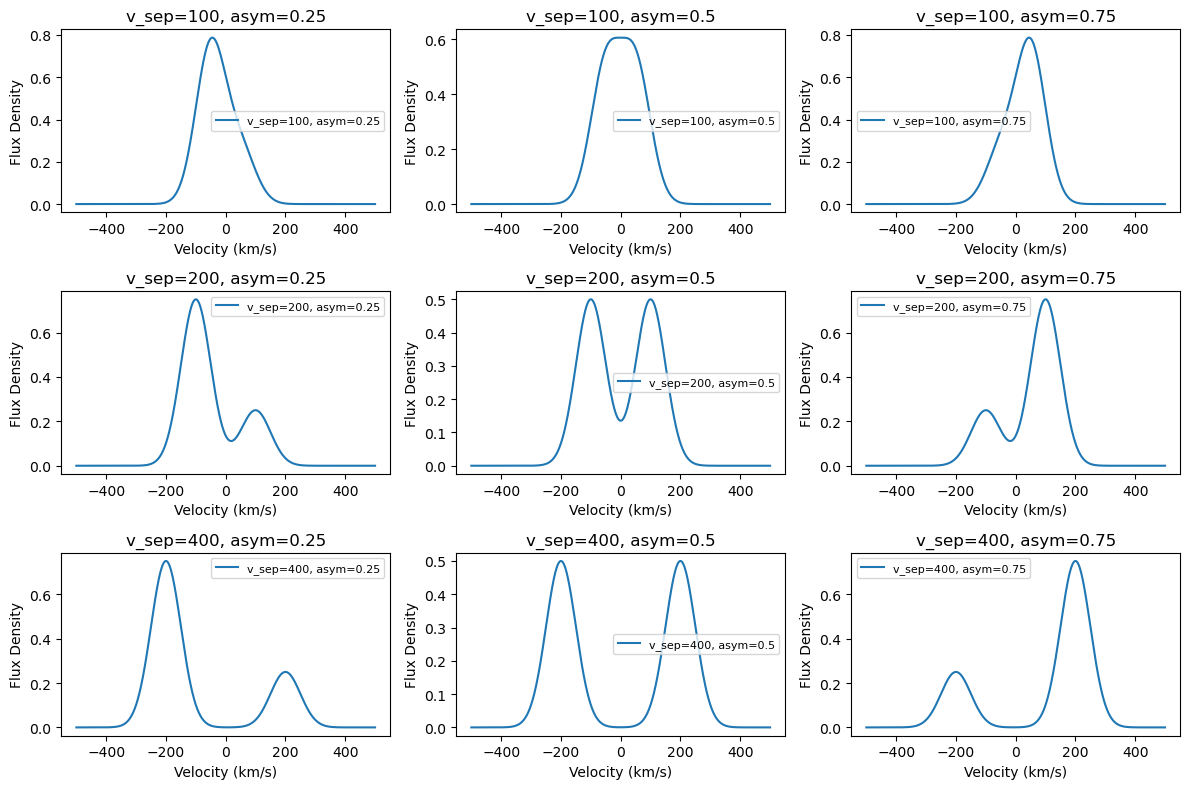

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(velocity, delta_v, sigma, amplitude=1):
    return amplitude * np.exp(-0.5 * ((velocity - delta_v) / sigma)**2)

def two_gaussians_with_asymmetry(velocity, v_separation, sigma, l_red_l_total):
    l_red = l_red_l_total
    l_blue = 1 - l_red

    # First Gaussian (blueshifted)
    gaussian_blue = gaussian(velocity, -v_separation / 2, sigma, amplitude=l_blue)

    # Second Gaussian (redshifted)
    gaussian_red = gaussian(velocity, v_separation / 2, sigma, amplitude=l_red)

    # Combining them
    return gaussian_blue + gaussian_red


if __name__ == "__main__":
 
    velocity = np.linspace(-500, 500, 1000)
    sigma = 50
    v_separations = [100, 200, 400]  # Velocity separations (km/s)
    asymmetries = [0.25, 0.5, 0.75]  # Asymmetry ratios (L_red / L_total)

    # Create plots
    plt.figure(figsize=(12, 8))

    for i, v_separation in enumerate(v_separations):
        for j, asymmetry in enumerate(asymmetries):
            profile = two_gaussians_with_asymmetry(velocity, v_separation, sigma, asymmetry)

            # Plot the result
            plt.subplot(len(v_separations), len(asymmetries), i * len(asymmetries) + j + 1)
            plt.plot(velocity, profile, label=f"v_sep={v_separation}, asym={asymmetry}")
            plt.title(f"v_sep={v_separation}, asym={asymmetry}")
            plt.xlabel("Velocity (km/s)")
            plt.ylabel("Flux Density")
            plt.legend(fontsize=8)

    plt.tight_layout()
    plt.show()